#### *****Student Performance & Behavior Dataset*****
https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset

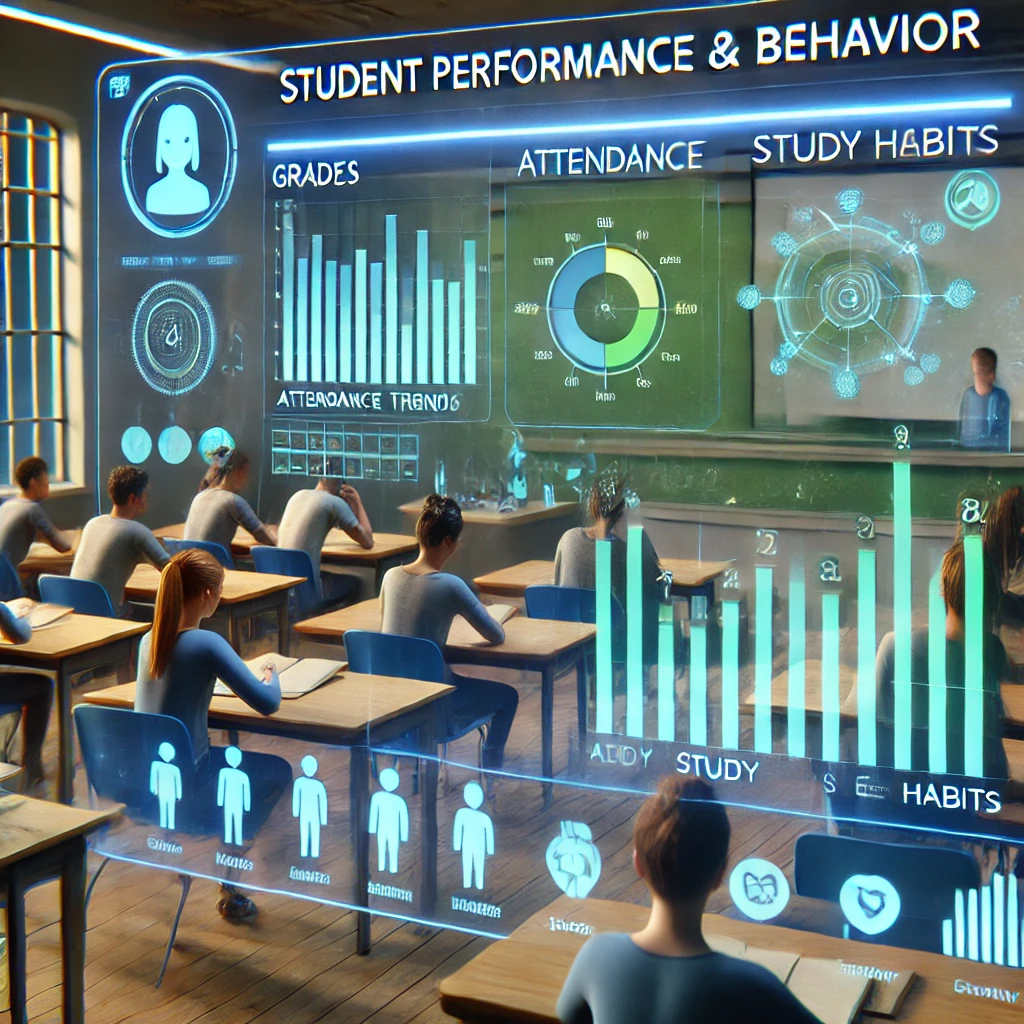

#### ***🎯 The Notebook In Colab.🎯***
#### ***Open This Link 👇👇👇***
https://colab.research.google.com/drive/11EMaYH7x75_BAodLc1Q1IrwvAYT101h8?usp=sharing

# ***Introduction***

#### ***Student Performance & Behavior Dataset***
* *This dataset is real data of 5,000 records collected from a private learning provider.*
* *The dataset includes key attributes necessary for exploring patterns, correlations, and insights related to academic performance.*
* *This project aims to analyze students' performance and academic behavior to explain the factors affecting their academic success and predict students at risk of failure.
This is done by applying graphic and statistical analysis techniques to discover patterns and relationships between variables.*


About Columns:

* **Student_ID**: Unique identifier for each student.
* **First_Name**: Student’s first name.
* **Last_Name**: Student’s last name.
* **Email**: Contact email (can be anonymized).
* **Gender**: Male, Female.
* **Age**: The age of the student.
* **Department**: Student's department (e.g., CS, Engineering, Business).
* **Attendance (%)**: Attendance percentage (0-100%).
* **Midterm_Score**: Midterm exam score (out of 100).
* **Final_Score**: Final exam score (out of 100).
* **Assignments_Avg**: Average score of all assignments (out of 100).
* **Quizzes_Avg**: Average quiz scores (out of 100).
* **Participation_Score**: Score based on class participation (0-10).
* **Projects_Score**: Project evaluation score (out of 100).
* **Total_Score**: Weighted sum of all grades.
* **Grade**: Letter grade (A, B, C, D, F).
* **Study_Hours_per_Week**: Average study hours per week.
* **Extracurricular_Activities**: Whether the student participates in extracurriculars (Yes/No).
* **Internet_Access_at_Home**: Does the student have access to the internet at home? (Yes/No).
* **Parent_Education_Level**: Highest education level of parents (None, High School, Bachelor's, Master's, PhD).
* **Family_Income_Level**: Low, Medium, High.
* **Stress_Level (1-10)**: Self-reported stress level (1: Low, 10: High).
* **Sleep_Hours_per_Night**: Average hours of sleep per night.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv
/kaggle/input/students-grading-dataset/metadata.xlsx
/kaggle/input/students-grading-dataset/Students_Grading_Dataset.json


# ***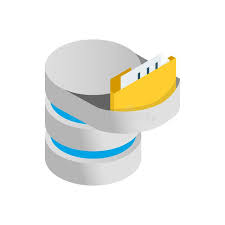1. Importing Dataset***

In [ ]:
# Reading Data.
df_1 = pd.read_csv('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv')
df_2 = pd.read_json('/kaggle/input/students-grading-dataset/Students_Grading_Dataset.json')

In [ ]:
df_1.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

In [ ]:
df_2.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                    None   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

In [ ]:
# Merge the files row by row (bottom of each other)
df = pd.concat([df_1, df_2], ignore_index=True)

***********************************************************************************************************************************************

# ***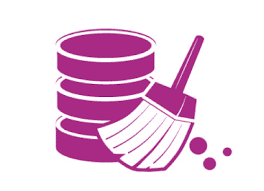2. Data Cleaning & Preprocessing***

In [ ]:
# Data size (number of rows and columns)
df.shape

(10000, 23)

In [ ]:
# Show first 10 rows
df.head(10)

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   
5      S1005       Liam     Brown  student5@university.com    Male   21   
6      S1006      Ahmed     Jones  student6@university.com    Male   24   
7      S1007      Ahmed     Smith  student7@university.com    Male   19   
8      S1008       Omar     Smith  student8@university.com  Female   21   
9      S1009       Sara     Smith  student9@university.com  Female   22   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   
5  Engineering             NaN          78.85        43.53  ...   
6     Business           57.60          66.26        89.07  ...   
7  Engineering           51.91          45.67        73.96  ...   
8           CS           85.97          84.42        90.87  ...   
9  Engineering           64.01          87.96        98.47  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   
5           67.29        62.08      B                   8.5   
6           93.65        83.21      F                  21.3   
7           93.24        81.93      F                  27.3   
8           94.01        95.62      A                   8.0   
9           78.60        84.99      A                   9.6   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     NaN   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   
5                         Yes                     Yes                     PhD   
6                          No                     Yes                     NaN   
7                         Yes                      No                     NaN   
8                          No                      No              Bachelor's   
9                          No                     Yes                     NaN   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  
5                High                   1                   5.0  
6                 Low                   5                   6.4  
7              Medium                   4                   4.3  
8                 Low                   9                   8.8  
9              Medium                  10                   6.4  

[10 rows x 23 columns]

In [ ]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  10000 non-null  object 
 1   First_Name                  10000 non-null  object 
 2   Last_Name                   10000 non-null  object 
 3   Email                       10000 non-null  object 
 4   Gender                      10000 non-null  object 
 5   Age                         10000 non-null  int64  
 6   Department                  10000 non-null  object 
 7   Attendance (%)              8968 non-null   float64
 8   Midterm_Score               10000 non-null  float64
 9   Final_Score                 10000 non-null  float64
 10  Assignments_Avg             8966 non-null   float64
 11  Quizzes_Avg                 10000 non-null  float64
 12  Participation_Score         10000 non-null  float64
 13  Projects_Score              1000

In [ ]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

#### **Identify missing values, inconsistencies, and outliers.**

In [ ]:
# View the number of missing values per column
df.isnull().sum()

# # Percentage of missing values for each column
# df.isnull().mean()* 100

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                1032
Midterm_Score                    0
Final_Score                      0
Assignments_Avg               1034
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        2778
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [ ]:
# Basic statistics of the data
df.describe().T

count       mean        std    min      25%     50%  \
Age                    10000.0  21.048400   1.989687  18.00  19.0000  21.000   
Attendance (%)          8968.0  75.431409  14.371644  50.01  63.2650  75.725   
Midterm_Score          10000.0  70.326844  17.212348  40.00  55.4575  70.510   
Final_Score            10000.0  69.640788  17.237882  40.00  54.6675  69.735   
Assignments_Avg         8966.0  74.798673  14.410996  50.00  62.0850  74.810   
Quizzes_Avg            10000.0  74.910728  14.503555  50.03  62.4900  74.695   
Participation_Score    10000.0   4.980024   2.889991   0.00   2.4400   4.955   
Projects_Score         10000.0  74.924860  14.422693  50.01  62.3200  74.980   
Total_Score            10000.0  75.121804  14.399221  50.02  62.8350  75.395   
Study_Hours_per_Week   10000.0  17.658860   7.275500   5.00  11.4000  17.500   
Stress_Level (1-10)    10000.0   5.480800   2.861407   1.00   3.0000   5.000   
Sleep_Hours_per_Night  10000.0   6.488140   1.452211   4.00   5.2000   6.500   

                           75%     max  
Age                    23.0000   24.00  
Attendance (%)         87.4725  100.00  
Midterm_Score          84.9700   99.98  
Final_Score            84.5000   99.98  
Assignments_Avg        86.9700   99.98  
Quizzes_Avg            87.6300   99.96  
Participation_Score     7.5000   10.00  
Projects_Score         87.3675  100.00  
Total_Score            87.6525   99.99  
Study_Hours_per_Week   24.1000   30.00  
Stress_Level (1-10)     8.0000   10.00  
Sleep_Hours_per_Night   7.7000    9.00

In [ ]:
# The number of unique values in each column.
df.nunique()

Student_ID                    5000
First_Name                       8
Last_Name                        6
Email                         5000
Gender                           2
Age                              7
Department                       4
Attendance (%)                2980
Midterm_Score                 3409
Final_Score                   3371
Assignments_Avg               2993
Quizzes_Avg                   3173
Participation_Score           1047
Projects_Score                3141
Total_Score                   3171
Grade                            5
Study_Hours_per_Week           251
Extracurricular_Activities       2
Internet_Access_at_Home          2
Parent_Education_Level           5
Family_Income_Level              3
Stress_Level (1-10)             10
Sleep_Hours_per_Night           51
dtype: int64

In [ ]:
# Display unique values for each column.
df = pd.DataFrame(df)

for column in df.columns:
    unique_values = df[column].unique()
    print(f" '🔹{column}': {unique_values}")
    print("*" * 97)

 '🔹Student_ID': ['S1000' 'S1001' 'S1002' ... 'S5997' 'S5998' 'S5999']
*************************************************************************************************
 '🔹First_Name': ['Omar' 'Maria' 'Ahmed' 'John' 'Liam' 'Sara' 'Emma' 'Ali']
*************************************************************************************************
 '🔹Last_Name': ['Williams' 'Brown' 'Jones' 'Smith' 'Davis' 'Johnson']
*************************************************************************************************
 '🔹Email': ['student0@university.com' 'student1@university.com'
 'student2@university.com' ... 'student4997@university.com'
 'student4998@university.com' 'student4999@university.com']
*************************************************************************************************
 '🔹Gender': ['Female' 'Male']
*************************************************************************************************
 '🔹Age': [22 18 24 23 21 19 20]
*************************************************

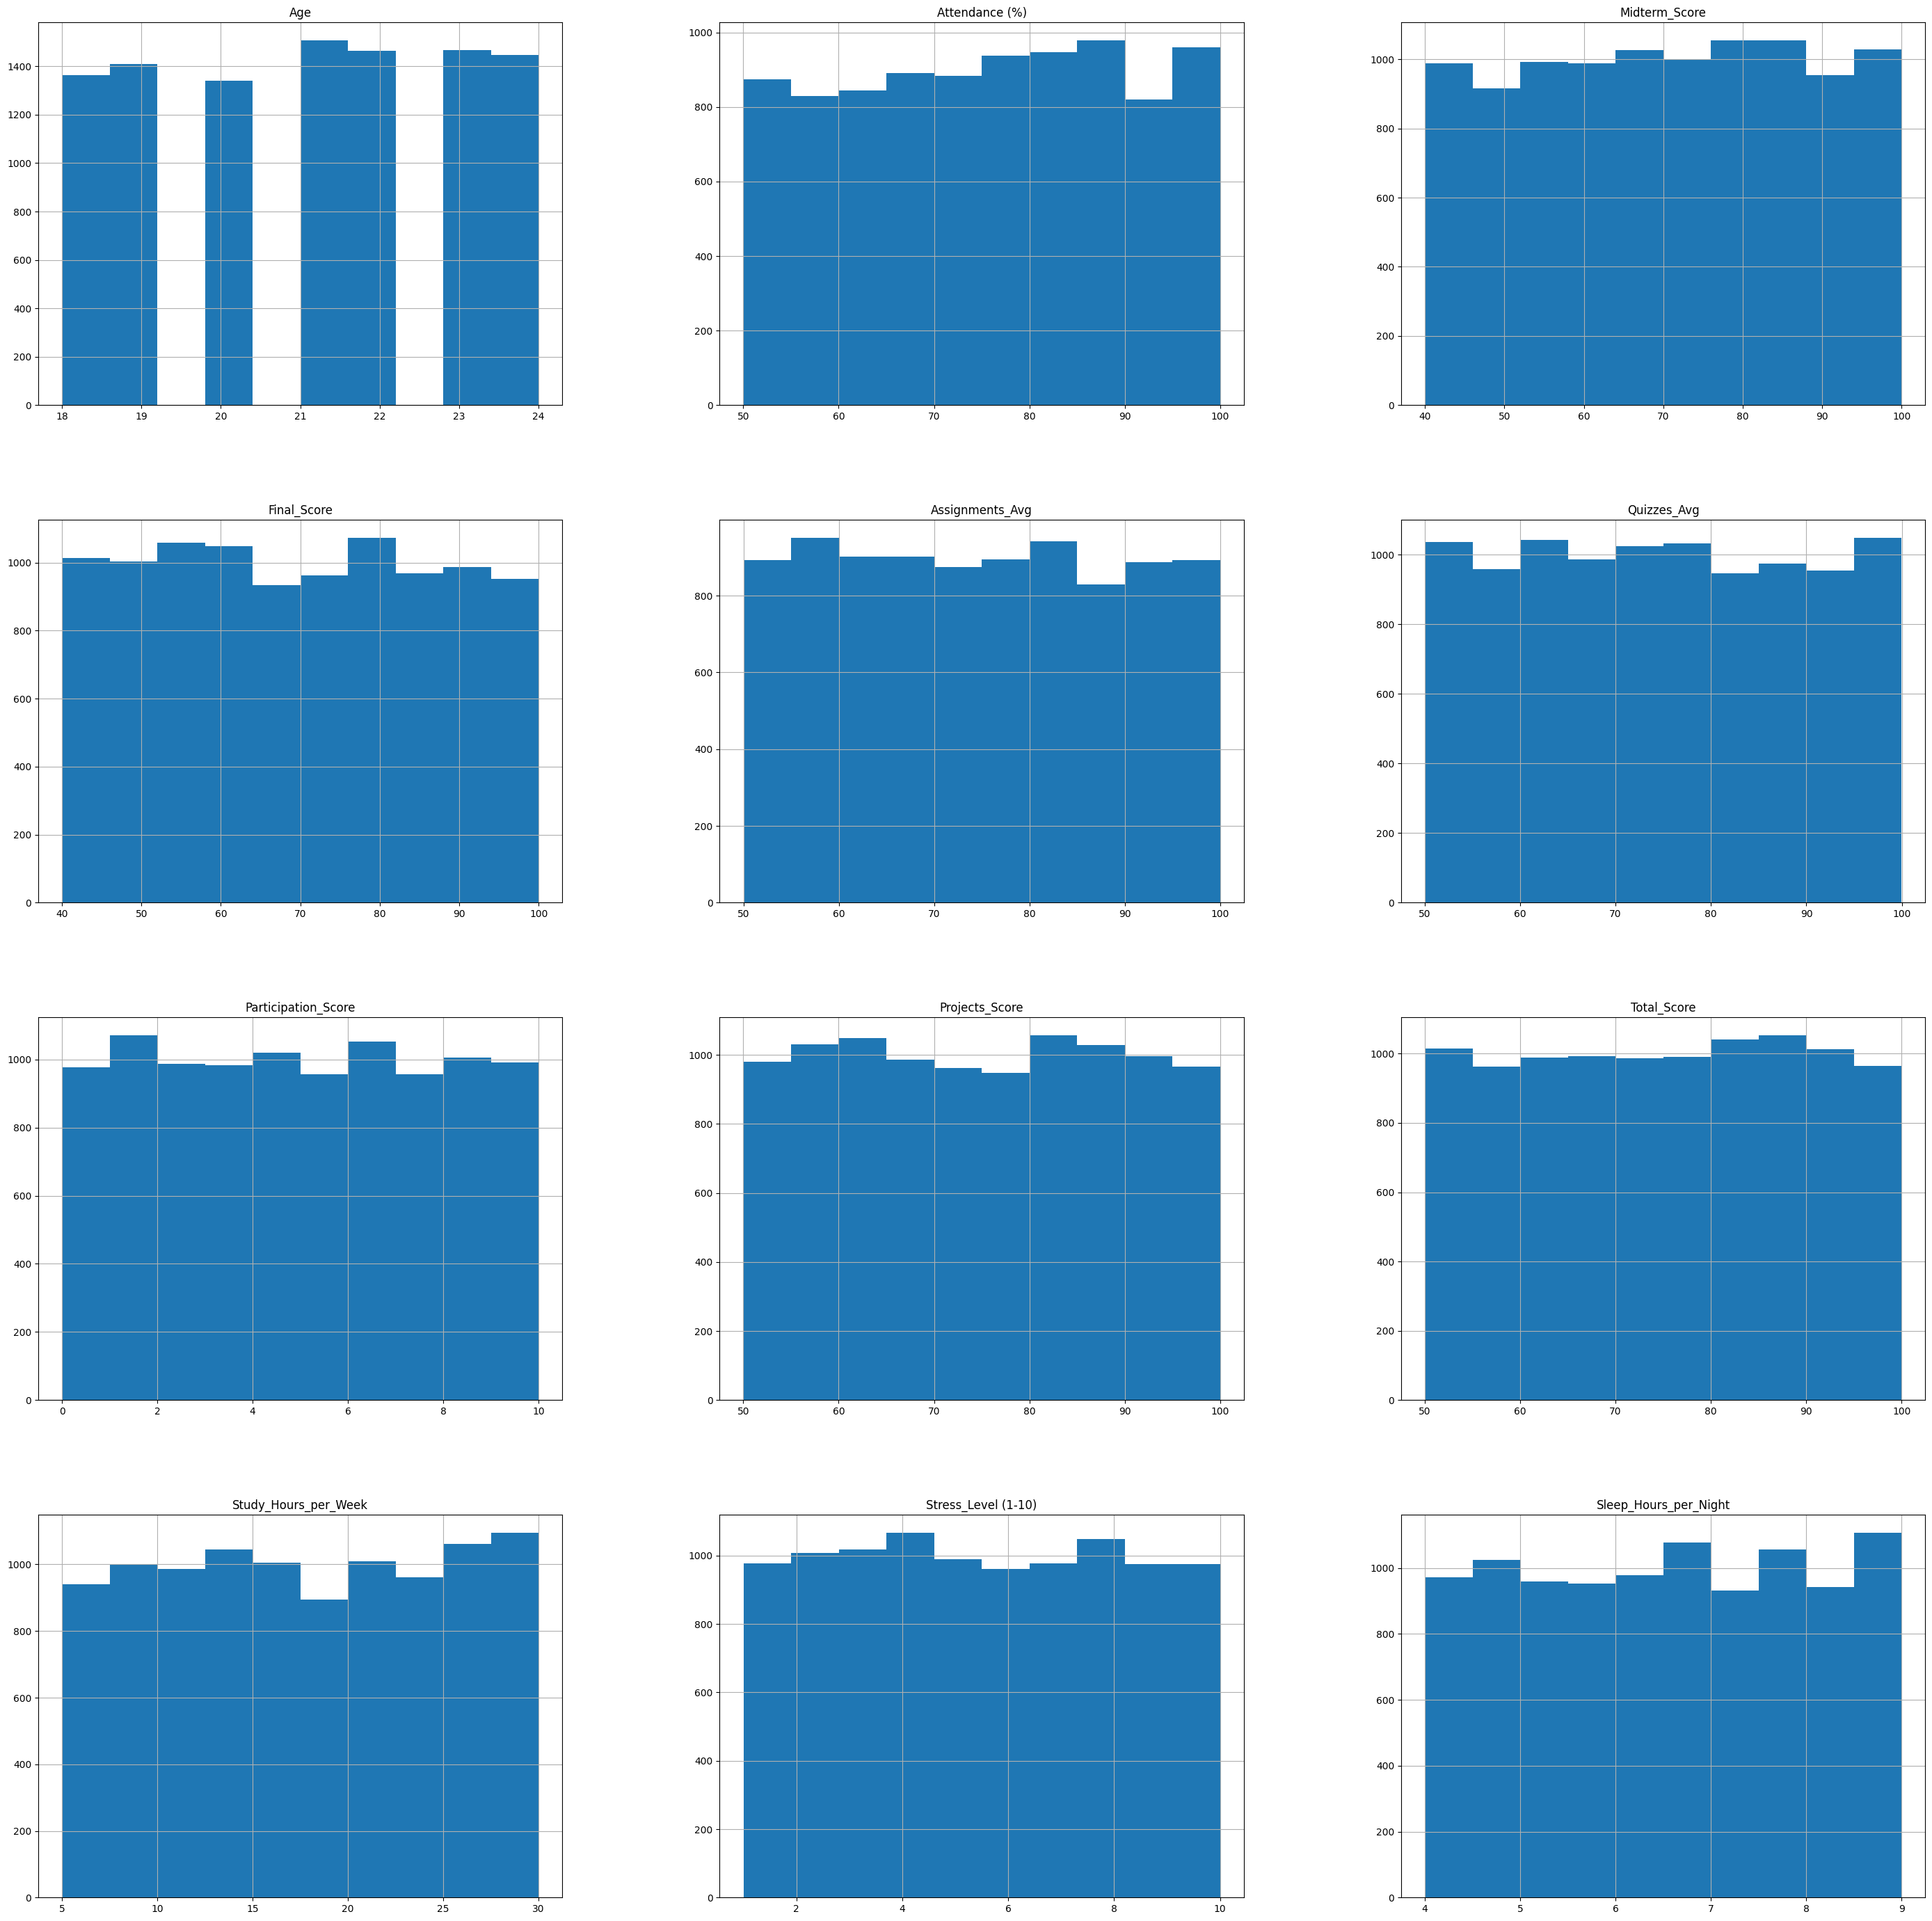

In [ ]:
# Plot the frequency distribution for each numerical column.
df.hist(figsize=(35, 35))
plt.show()

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

#### **Identify missing values, inconsistencies, and outliers.**

In [ ]:
# View the number of missing values per column.
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                1032
Midterm_Score                    0
Final_Score                      0
Assignments_Avg               1034
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        2778
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [ ]:
# Show number of rows and columns.
df.shape

(10000, 23)

In [ ]:
# Count the number of duplicate rows.
df.duplicated().sum()

3981

In [ ]:
# Remove duplicate rows.
df.drop_duplicates(inplace = True)

In [ ]:
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
9971      S5971      Maria     Davis  student4971@university.com    Male   22   
9972      S5972      Maria     Davis  student4972@university.com  Female   24   
9990      S5990        Ali   Johnson  student4990@university.com    Male   24   
9992      S5992       Sara   Johnson  student4992@university.com    Male   18   
9993      S5993        Ali   Johnson  student4993@university.com  Female   22   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0     Engineering           52.29          55.03        57.82  ...   
1     Engineering           97.27          97.23        45.80  ...   
2        Business           57.19          67.05        93.68  ...   
3     Mathematics           95.15          47.79        80.63  ...   
4              CS           54.18          46.59        78.89  ...   
...           ...             ...            ...          ...  ...   
9971  Engineering           59.52          91.27        87.17  ...   
9972     Business           93.59          77.11        87.99  ...   
9990           CS           80.53          87.83        43.70  ...   
9992           CS             NaN          61.44        64.59  ...   
9993     Business           99.21          60.16        59.18  ...   

      Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0              85.90        56.09      F                   6.2   
1              55.65        50.64      A                  19.0   
2              73.79        70.30      D                  20.7   
3              92.12        61.63      A                  24.8   
4              68.42        66.13      F                  15.4   
...              ...          ...    ...                   ...   
9971           73.54        73.20      F                  29.3   
9972           57.13        55.51      B                  20.5   
9990           65.16        81.18      F                  15.2   
9992           80.08        62.51      A                  23.3   
9993           69.56        85.86      A                  16.9   

      Extracurricular_Activities Internet_Access_at_Home  \
0                             No                     Yes   
1                             No                     Yes   
2                             No                     Yes   
3                            Yes                     Yes   
4                            Yes                     Yes   
...                          ...                     ...   
9971                         Yes                     Yes   
9972                          No                     Yes   
9990                          No                     Yes   
9992                         Yes                      No   
9993                          No                     Yes   

      Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
0                High School              Medium                   5   
1                        NaN              Medium                   4   
2                   Master's                 Low                   6   
3                High School                High                   3   
4                High School                High                   2   
...                      ...                 ...                 ...   
9971                    None                 Low                   3   
9972                    None              Medium                   3   
9990                    None 

In [ ]:
df.shape

(6019, 23)

In [ ]:
df.duplicated().sum()

0

#### 🔸 Duplicate Data Removed

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

### 💡 Handling Missing Values 💡

In [ ]:
# The number of unique values in each column.
df.nunique()

Student_ID                    5000
First_Name                       8
Last_Name                        6
Email                         5000
Gender                           2
Age                              7
Department                       4
Attendance (%)                2980
Midterm_Score                 3409
Final_Score                   3371
Assignments_Avg               2993
Quizzes_Avg                   3173
Participation_Score           1047
Projects_Score                3141
Total_Score                   3171
Grade                            5
Study_Hours_per_Week           251
Extracurricular_Activities       2
Internet_Access_at_Home          2
Parent_Education_Level           5
Family_Income_Level              3
Stress_Level (1-10)             10
Sleep_Hours_per_Night           51
dtype: int64

In [ ]:
# Returns the number of missing values in each column.
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 616
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                626
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1847
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

Columns with missing values:
* *Attendance (%)*    ------> float64
* *Assignments_Avg*   ------> float64
* *Parent_Education_Level* --->  object

In [ ]:
# Display only unique values for selected columns in subset.
subset = ['Attendance (%)', 'Assignments_Avg', 'Parent_Education_Level']

for column in subset:
    if column in df.columns:
        unique_values = df[column].unique()
        print(f" '🔹{column}': {unique_values}")
        print("*" * 97)

 '🔹Attendance (%)': [52.29 97.27 57.19 ... 55.54 99.21 83.92]
*************************************************************************************************
 '🔹Assignments_Avg': [84.22   nan 67.7  ... 59.74 75.26 81.2 ]
*************************************************************************************************
 '🔹Parent_Education_Level': ['High School' nan "Master's" 'PhD' "Bachelor's" 'None' None]
*************************************************************************************************


### 📌 Handling With Missing Values In a "Attendance (%)"

In [ ]:
# Fill missing values with mean.
df['Attendance (%)'].fillna(df['Attendance (%)'].mean(), inplace=True)

In [ ]:
# Check if "Attendance (%)" contains missing values (NaN).
df['Attendance (%)'].isnull().any()

False

### 📌 Handling With Missing Values In a "Assignments_Avg"

In [ ]:
# Fill missing values with mean.
df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean(), inplace=True)

In [ ]:
# Check if "Assignments_Avg" contains missing values (NaN).
df['Assignments_Avg'].isnull().any()

False

### 📌 Handling With Missing Values In a "Parent_Education_Level"

In [ ]:
# Count the frequency of each individual value.
df['Parent_Education_Level'].value_counts()

Parent_Education_Level
PhD            859
Bachelor's     850
High School    828
Master's       825
None           810
Name: count, dtype: int64

In [ ]:
# Fill in missing values with mode.
df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0], inplace=True)

In [ ]:
# Check if "Assignments_Avg" contains missing values (NaN).
df['Parent_Education_Level'].isnull().any()

False

In [ ]:
df.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [ ]:
# Save the merged data to a new file.👇👇👇
# df.to_csv("Diabetes Prediction Dataset.csv")

#### 🔸 No Missing Data
#### 🔸 Duplicate Data Removed
#### 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

***********************************************************************************************************************************************

# ***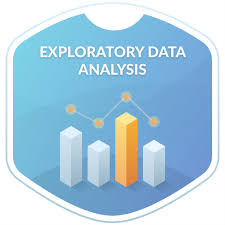3. Exploratory Data Analysis (EDA)***

In [ ]:
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
9971      S5971      Maria     Davis  student4971@university.com    Male   22   
9972      S5972      Maria     Davis  student4972@university.com  Female   24   
9990      S5990        Ali   Johnson  student4990@university.com    Male   24   
9992      S5992       Sara   Johnson  student4992@university.com    Male   18   
9993      S5993        Ali   Johnson  student4993@university.com  Female   22   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0     Engineering       52.290000          55.03        57.82  ...   
1     Engineering       97.270000          97.23        45.80  ...   
2        Business       57.190000          67.05        93.68  ...   
3     Mathematics       95.150000          47.79        80.63  ...   
4              CS       54.180000          46.59        78.89  ...   
...           ...             ...            ...          ...  ...   
9971  Engineering       59.520000          91.27        87.17  ...   
9972     Business       93.590000          77.11        87.99  ...   
9990           CS       80.530000          87.83        43.70  ...   
9992           CS       75.479883          61.44        64.59  ...   
9993     Business       99.210000          60.16        59.18  ...   

      Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0              85.90        56.09      F                   6.2   
1              55.65        50.64      A                  19.0   
2              73.79        70.30      D                  20.7   
3              92.12        61.63      A                  24.8   
4              68.42        66.13      F                  15.4   
...              ...          ...    ...                   ...   
9971           73.54        73.20      F                  29.3   
9972           57.13        55.51      B                  20.5   
9990           65.16        81.18      F                  15.2   
9992           80.08        62.51      A                  23.3   
9993           69.56        85.86      A                  16.9   

      Extracurricular_Activities Internet_Access_at_Home  \
0                             No                     Yes   
1                             No                     Yes   
2                             No                     Yes   
3                            Yes                     Yes   
4                            Yes                     Yes   
...                          ...                     ...   
9971                         Yes                     Yes   
9972                          No                     Yes   
9990                          No                     Yes   
9992                         Yes                      No   
9993                          No                     Yes   

      Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
0                High School              Medium                   5   
1                        PhD              Medium                   4   
2                   Master's                 Low                   6   
3                High School                High                   3   
4                High School                High                   2   
...                      ...                 ...                 ...   
9971                    None                 Low                   3   
9972                    None              Medium                   3   
9990                     PhD 

In [ ]:
# Show first 5 rows of data.
df.head()

Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65        50.64      A                  19.0   
2           73.79        70.30      D                  20.7   
3           92.12        61.63      A                  24.8   
4           68.42        66.13      F                  15.4   

   Extracurricular_Activities Internet_Access_at_Home  Parent_Education_Level  \
0                          No                     Yes             High School   
1                          No                     Yes                     PhD   
2                          No                     Yes                Master's   
3                         Yes                     Yes             High School   
4                         Yes                     Yes             High School   

  Family_Income_Level Stress_Level (1-10) Sleep_Hours_per_Night  
0              Medium                   5                   4.7  
1              Medium                   4                   9.0  
2                 Low                   6                   6.2  
3                High                   3                   6.7  
4                High                   2                   7.1  

[5 rows x 23 columns]

In [ ]:
# View general information about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  6019 non-null   object 
 1   First_Name                  6019 non-null   object 
 2   Last_Name                   6019 non-null   object 
 3   Email                       6019 non-null   object 
 4   Gender                      6019 non-null   object 
 5   Age                         6019 non-null   int64  
 6   Department                  6019 non-null   object 
 7   Attendance (%)              6019 non-null   float64
 8   Midterm_Score               6019 non-null   float64
 9   Final_Score                 6019 non-null   float64
 10  Assignments_Avg             6019 non-null   float64
 11  Quizzes_Avg                 6019 non-null   float64
 12  Participation_Score         6019 non-null   float64
 13  Projects_Score              6019 non-n

In [ ]:
# Display descriptive statistics for numeric data.
df.describe().T

count       mean        std    min     25%        50%  \
Age                    6019.0  21.042200   1.989808  18.00  19.000  21.000000   
Attendance (%)         6019.0  75.479883  13.626148  50.01  64.780  75.479883   
Midterm_Score          6019.0  70.375135  17.298322  40.00  55.395  70.560000   
Final_Score            6019.0  69.586101  17.232218  40.00  54.560  69.720000   
Assignments_Avg        6019.0  74.726141  13.692280  50.00  63.330  74.726141   
Quizzes_Avg            6019.0  74.967139  14.460584  50.03  62.510  74.940000   
Participation_Score    6019.0   4.900005   2.900581   0.00   2.315   4.810000   
Projects_Score         6019.0  74.907883  14.393950  50.01  62.370  74.980000   
Total_Score            6019.0  75.074567  14.410452  50.02  62.715  75.370000   
Study_Hours_per_Week   6019.0  17.752849   7.265323   5.00  11.600  17.600000   
Stress_Level (1-10)    6019.0   5.498089   2.865337   1.00   3.000   5.000000   
Sleep_Hours_per_Night  6019.0   6.477837   1.455253   4.00   5.200   6.500000   

                          75%     max  
Age                    23.000   24.00  
Attendance (%)         86.320  100.00  
Midterm_Score          85.270   99.98  
Final_Score            84.430   99.98  
Assignments_Avg        85.475   99.98  
Quizzes_Avg            87.555   99.96  
Participation_Score     7.410   10.00  
Projects_Score         87.260  100.00  
Total_Score            87.610   99.99  
Study_Hours_per_Week   24.200   30.00  
Stress_Level (1-10)     8.000   10.00  
Sleep_Hours_per_Night   7.700    9.00

In [ ]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

### ***💫1. The basic pillars of student performance💫***
* **✅ Department**: Academic department (important if there is a breakdown by major).
* **✅ Midterm_Score**: Midterm Exam Score.
* **✅ Final_Score**: Final Exam Score.
* **✅ Assignments_Avg**: Average homework grades.
* **✅ Quizzes_Avg**: Average quiz scores.
* **✅ Participation_Score**: Class participation rate.
* **✅ Projects_Score**: Project Degree.
* **✅ Total_Score**: Total score.
* **✅ Grade**: Final assessment.

### ***💫2. Behavioral factors and study habits💫***
* **✅ Attendance (%)**: Attendance rate.
* **✅ Study_Hours_per_Week**: Number of study hours per week.
* **✅ Extracurricular_Activities**: Participation in extracurricular activities.
* **✅ Stress_Level (1-10)**: stress level.
* **✅ Sleep_Hours_per_Night**: Number of hours of sleep per day.

### ***💫3. Socio-demographic factors (may be important but not always necessary)💫***
* **⚠️ Internet_Access_at_Home**: Internet access at home.
* **⚠️ Parent_Education_Level**: Parents' education level.
* **⚠️ Family_Income_Level**: Family income level.

### ***💫4. Personal and administrative information (less important)💫***
* **❌ Student_ID**
* **❌ First_Name**
* **❌ Last_Name**
* **❌ Email**
* **❌ Gender**

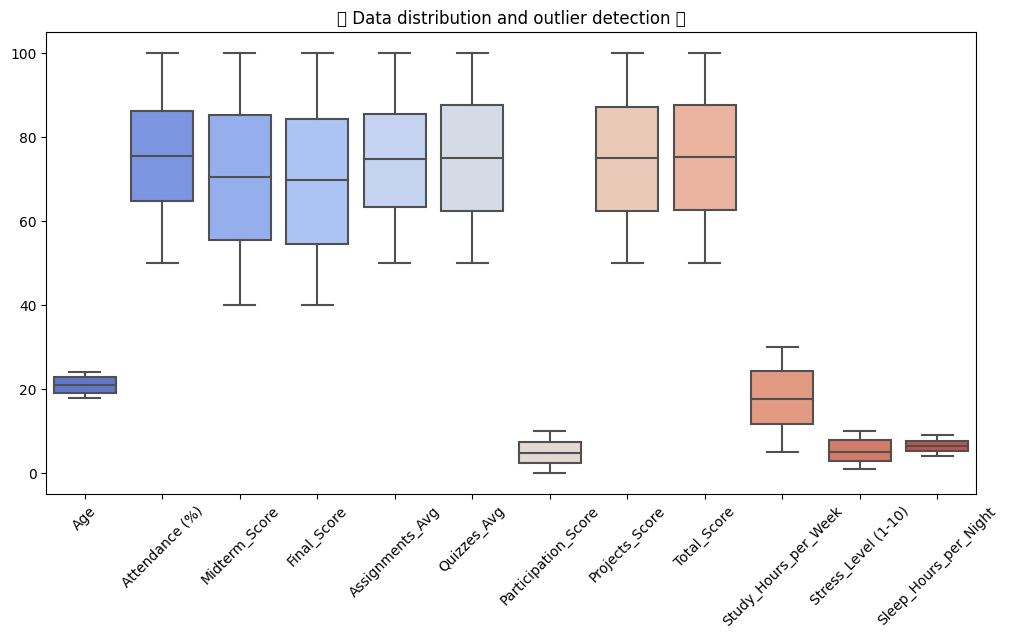

In [ ]:
# Distribution analysis and extreme values for each column.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("💥 Data distribution and outlier detection 💥")
plt.show()

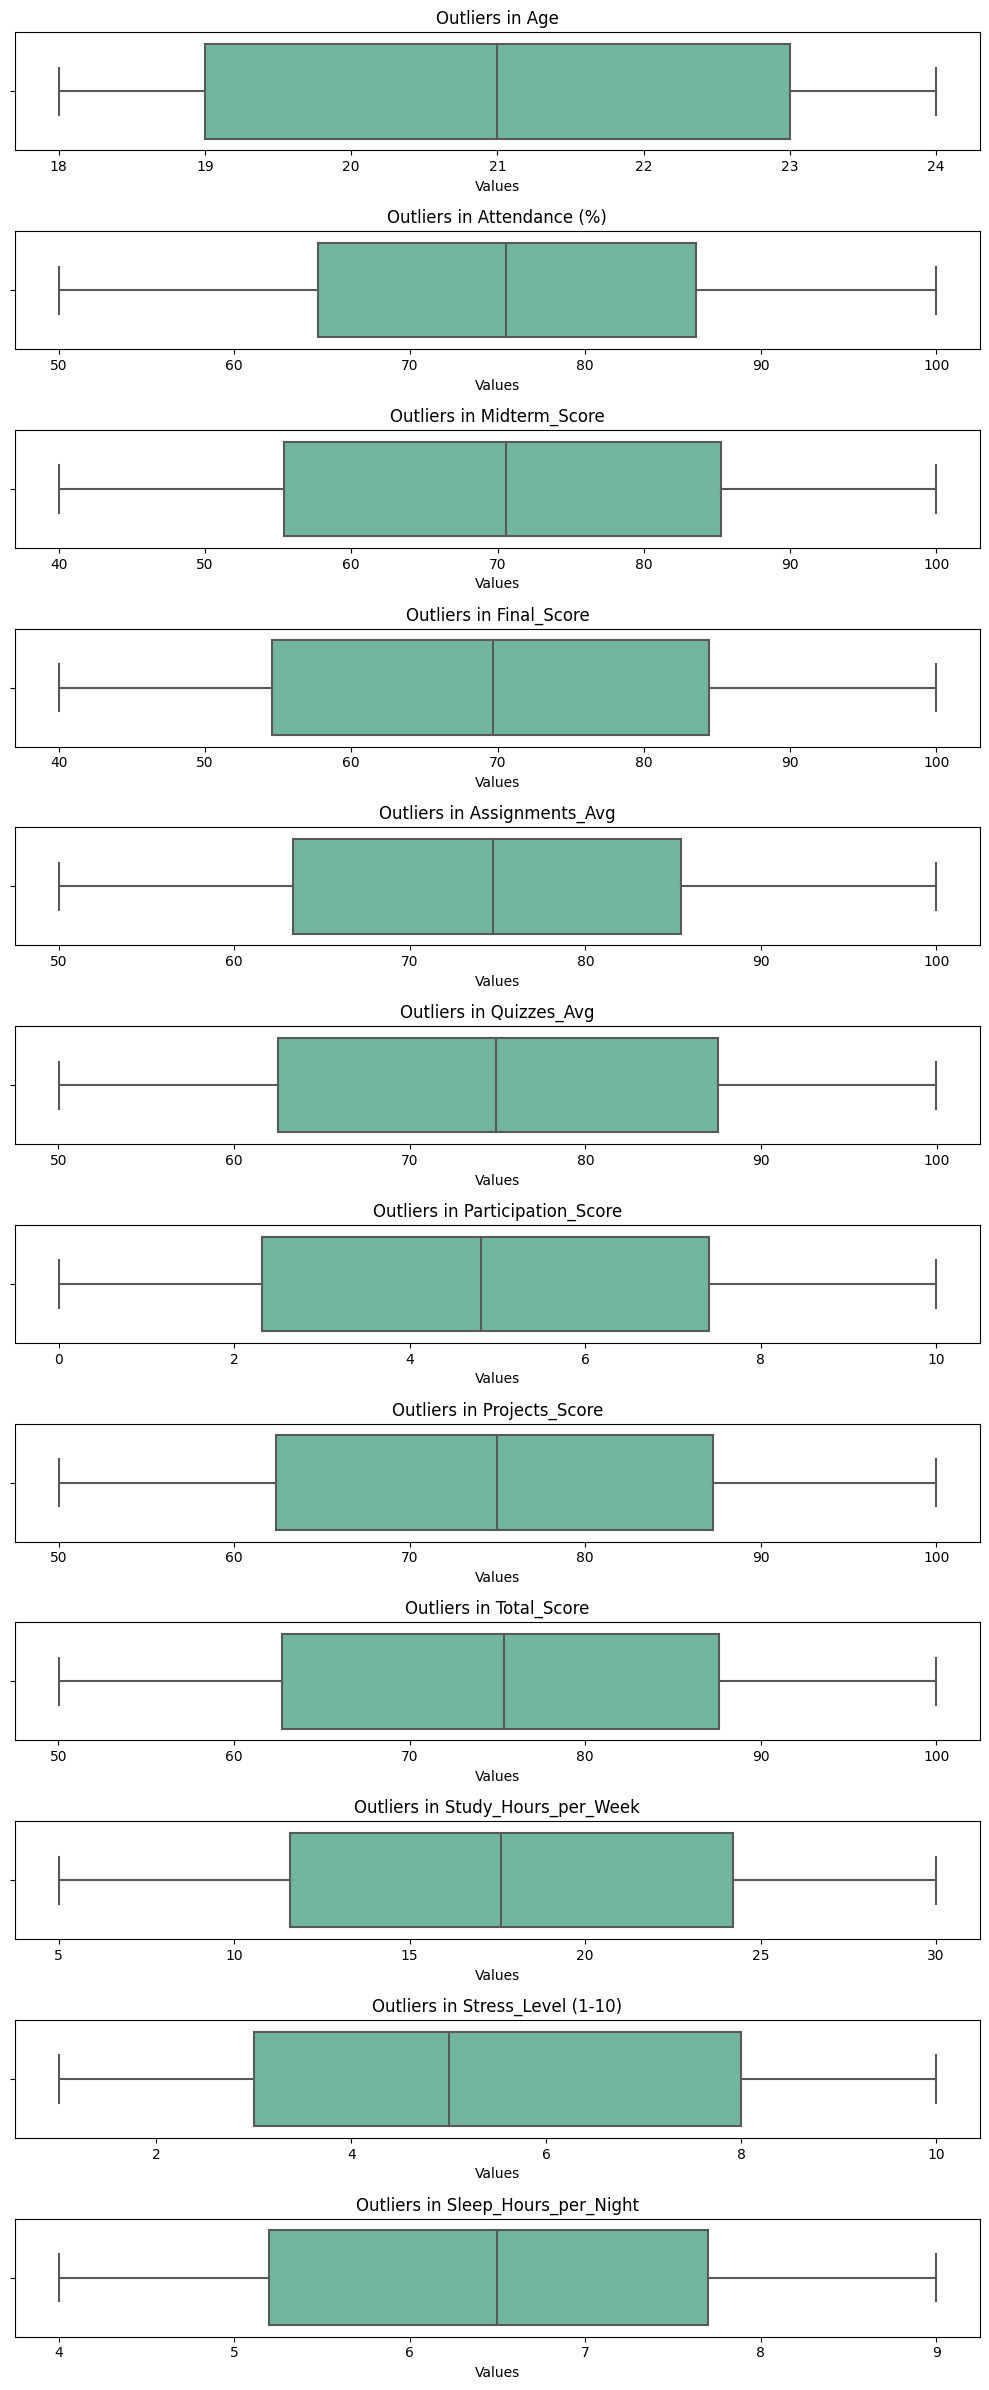

In [ ]:
columns = [
       'Age',
       'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'
]

num_cols = len(columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, num_cols * 2))

for i, column in enumerate(columns):
    sns.boxplot(x=df[column], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Outliers in {column}", fontsize=12)
    axes[i].set_xlabel("Values")

plt.tight_layout()
plt.show()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### ***1. 💥 Total score distribution analysis.💥***

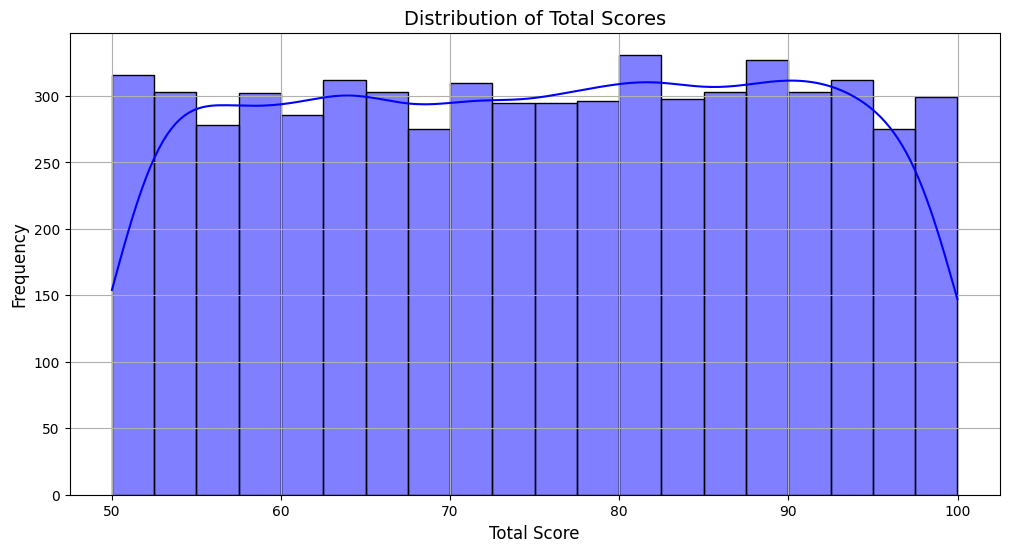

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total_Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Total Scores', fontsize=14)
plt.xlabel('Total Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

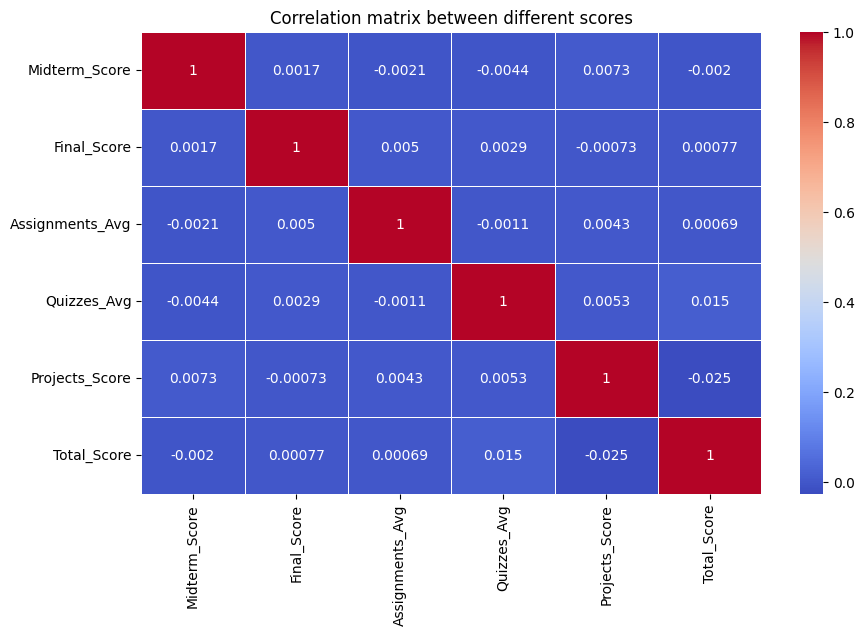

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score', 'Total_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation matrix between different scores")
plt.show()

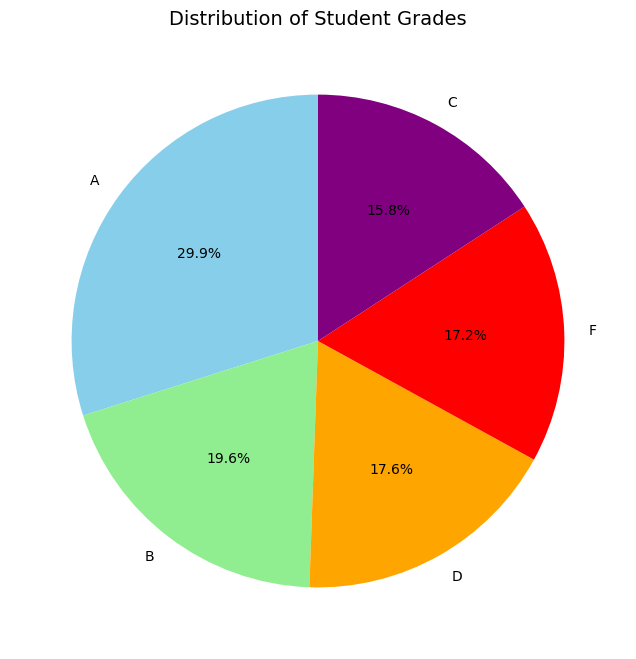

Grade
A    1799
B    1177
D    1057
F    1034
C     952
Name: count, dtype: int64

In [ ]:
grade_counts = df['Grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightgreen', 'orange', 'red', 'purple'], startangle=90)
plt.title('Distribution of Student Grades', fontsize=14)
plt.show()

grade_counts

#### ***2. 💥 The relationship between study hours and total grade.💥***

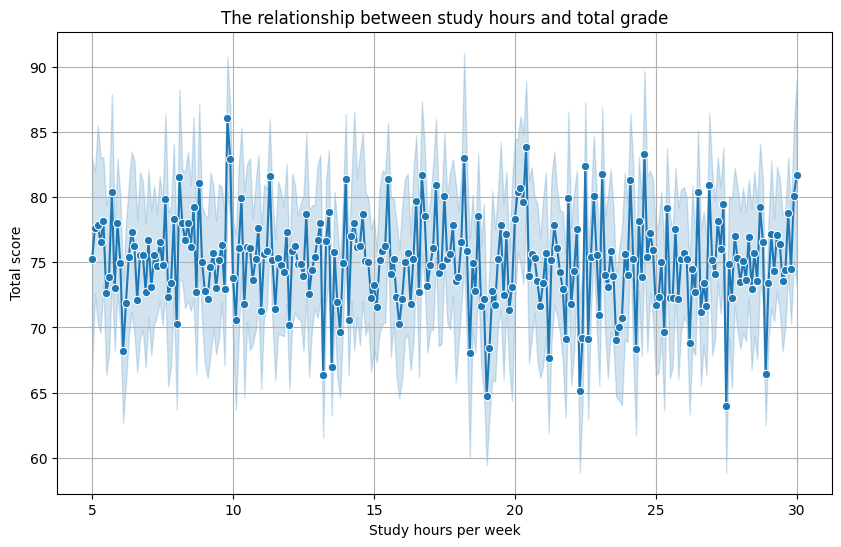

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Study_Hours_per_Week', y='Total_Score', data=df, marker='o')

plt.title('The relationship between study hours and total grade')
plt.xlabel('Study hours per week')
plt.ylabel('Total score')
plt.grid(True)

plt.show()

#### ***3. 💥 Distribution of grades by gender.💥***

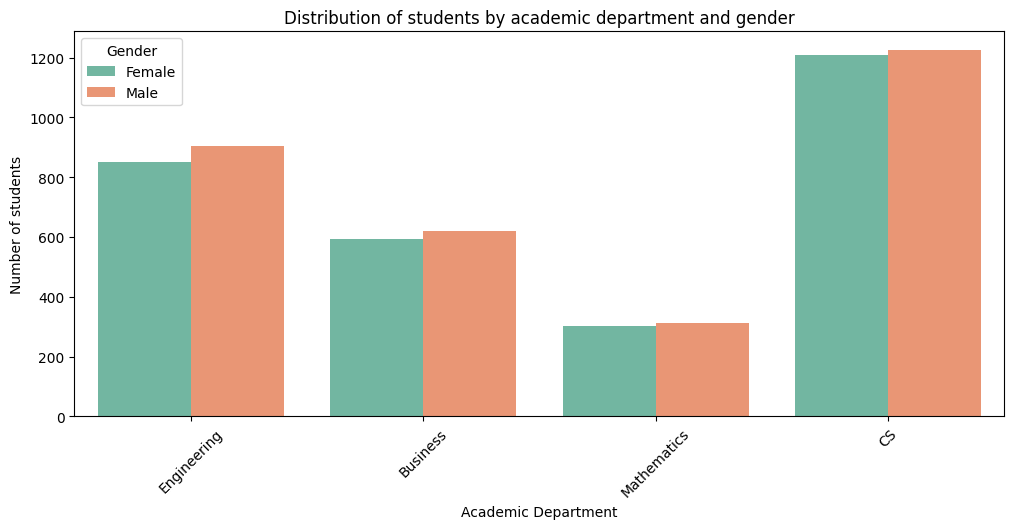

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Department'], hue=df['Gender'], palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of students by academic department and gender")
plt.xlabel("Academic Department")
plt.ylabel("Number of students")
plt.show()

#### ***4. 💥 The relationship between stress level and total score.💥***

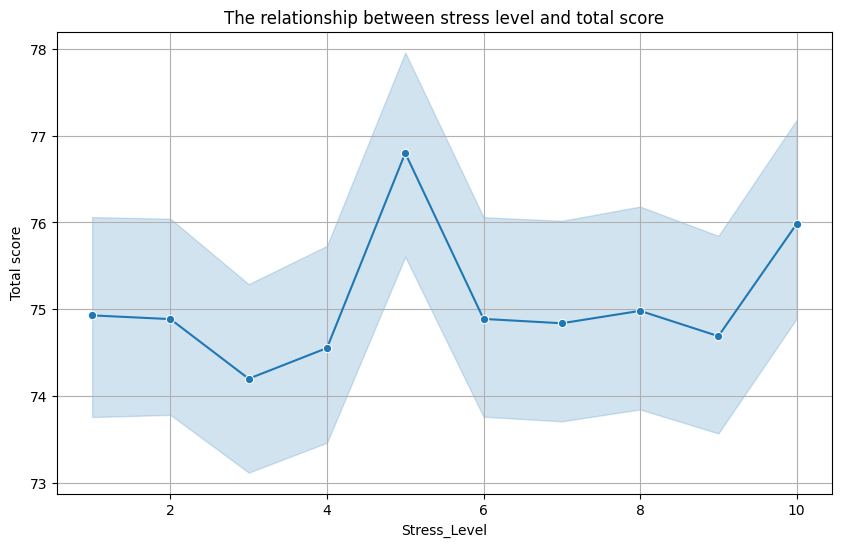

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stress_Level (1-10)', y='Total_Score', data=df, marker='o')
plt.title('The relationship between stress level and total score')
plt.xlabel('Stress_Level')
plt.ylabel('Total score')
plt.grid(True)
plt.show()

#### ***5. 💥 Sleep hours distribution.💥***

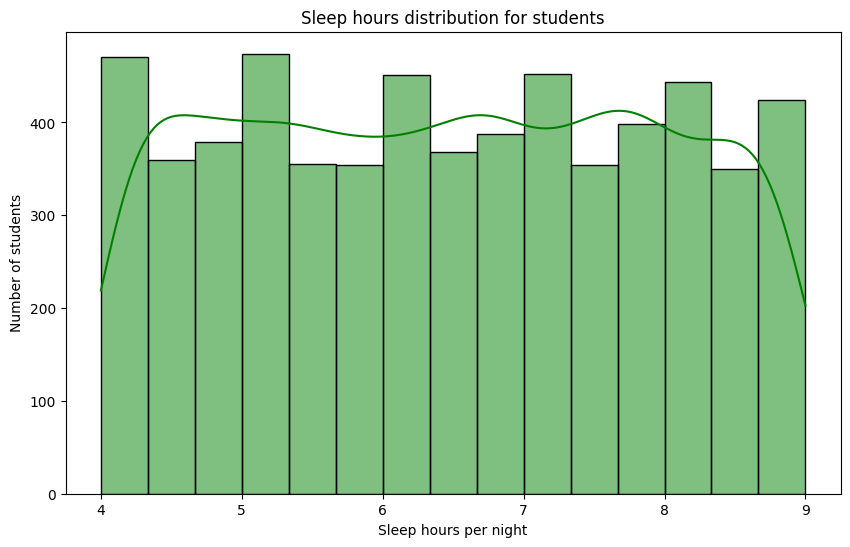

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Hours_per_Night'], kde=True, bins=15, color='green')
plt.title('Sleep hours distribution for students')
plt.xlabel('Sleep hours per night')
plt.ylabel('Number of students')
plt.show()

#### ***6. 💥 The relationship between family income and total score.💥***

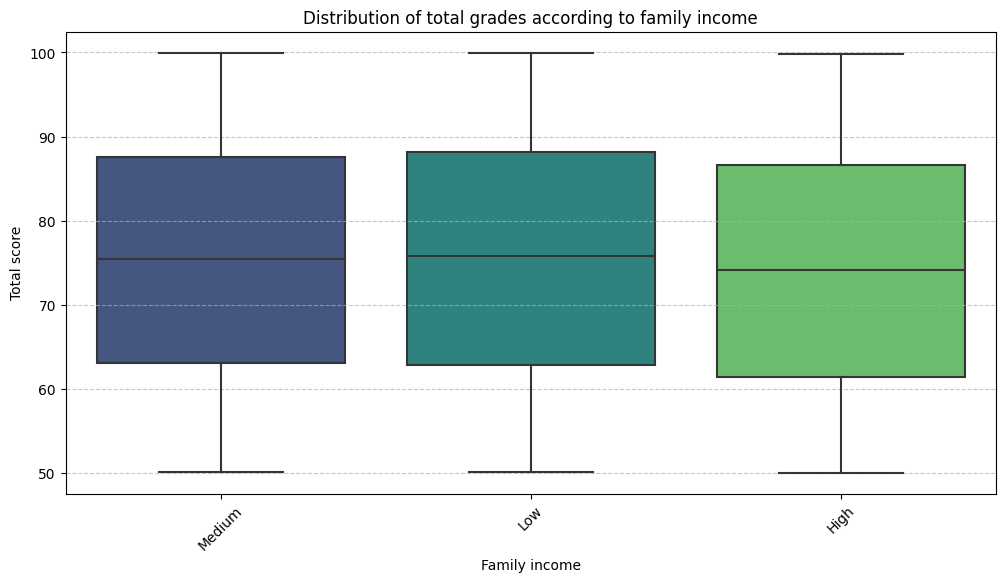

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_Income_Level', y='Total_Score', data=df, palette='viridis')

plt.title('Distribution of total grades according to family income')
plt.xlabel('Family income')
plt.ylabel('Total score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### ***7. 💥 The average project scores between departments.💥***

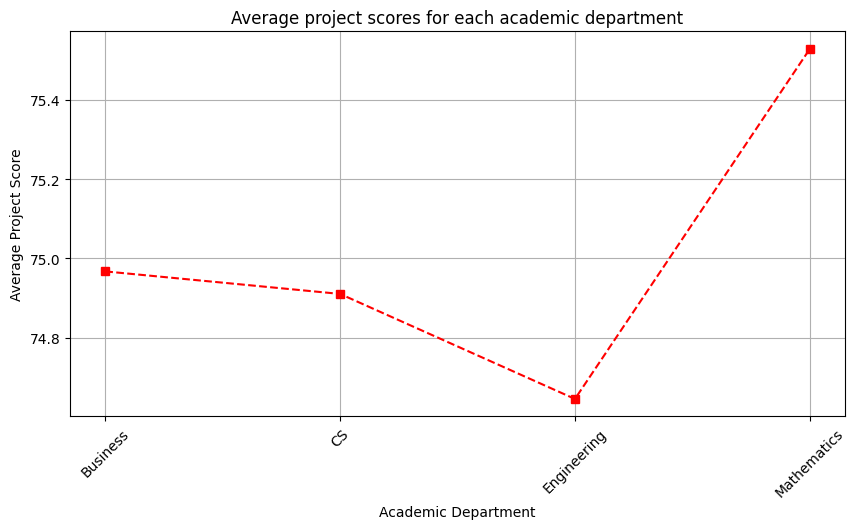

In [ ]:
project_scores = df.groupby("Department")["Projects_Score"].mean()

plt.figure(figsize=(10, 5))
plt.plot(project_scores, marker='s', linestyle='--', color='r')

plt.title("Average project scores for each academic department")
plt.xlabel("Academic Department")
plt.ylabel("Average Project Score")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### ***8. 💥 The effect of family income level on academic performance.💥***

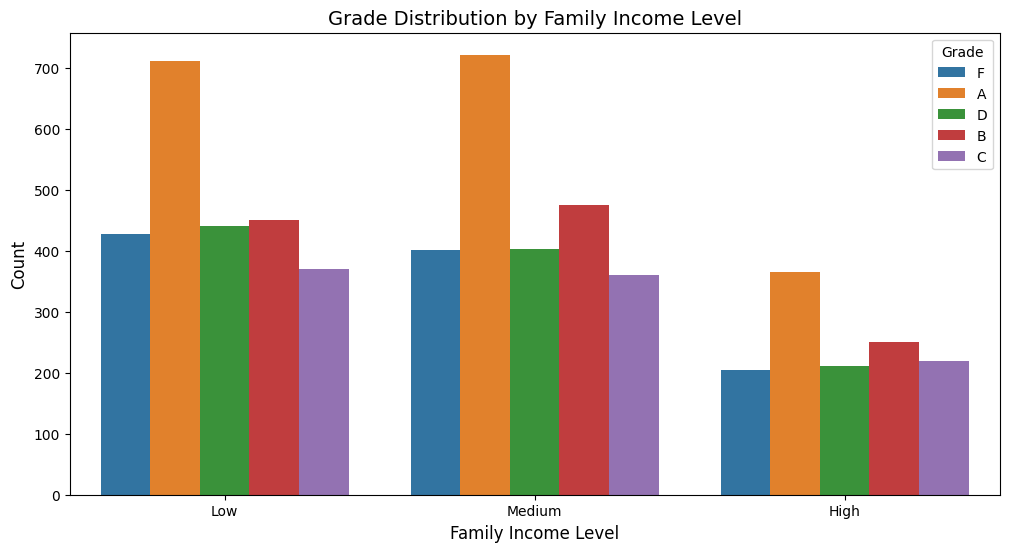

Family_Income_Level
High      74.266848
Low       75.364069
Medium    75.208596
Name: Total_Score, dtype: float64

In [ ]:
# plot Grade Distribution by Family Income Level
plt.figure(figsize=(12, 6))
sns.countplot(x="Family_Income_Level", hue="Grade", data=df, order=df["Family_Income_Level"].value_counts().index)
plt.title("Grade Distribution by Family Income Level", fontsize=14)
plt.xlabel("Family Income Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Grade")
plt.show()

income_grade_avg = df.groupby("Family_Income_Level")["Total_Score"].mean()
income_grade_avg

#### ***9. 💥 Is there a significant gender difference in academic performance?💥***

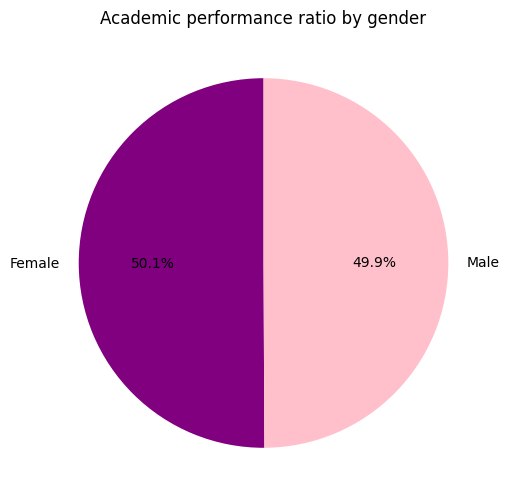

Gender
Female    75.187130
Male      74.965792
Name: Total_Score, dtype: float64

In [ ]:
gender_avg = df.groupby("Gender")["Total_Score"].mean()

plt.figure(figsize=(6, 6))
plt.pie(gender_avg, labels=gender_avg.index, autopct='%1.1f%%', colors=['purple', 'pink'], startangle=90)
plt.title("Academic performance ratio by gender")
plt.show()

gender_grade_avg = df.groupby("Gender")["Total_Score"].mean()
gender_grade_avg

#### ***10. 💥 Relationship between attendance and overall grades.💥***

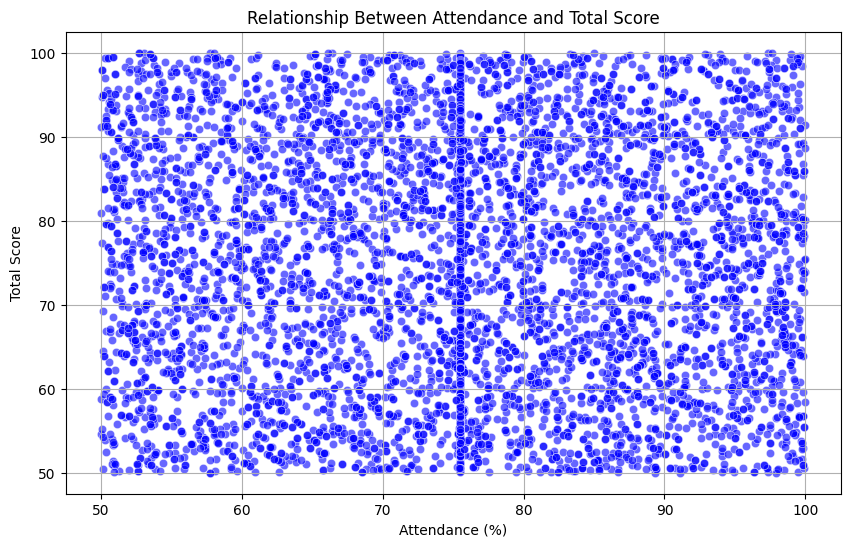

-0.017176110429282163

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Attendance (%)", y="Total_Score", data=df, alpha=0.6, color="blue")

plt.title("Relationship Between Attendance and Total Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Total Score")
plt.grid(True)

plt.show()

attendance_correlation = df["Attendance (%)"].corr(df["Total_Score"])
attendance_correlation

***********************************************************************************************************************************************

# ***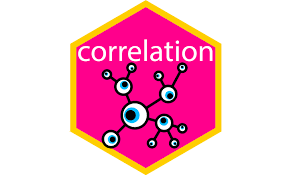4. Correlations & Patterns***

#### ***1. ⚡ Correlation Matrix.⚡***

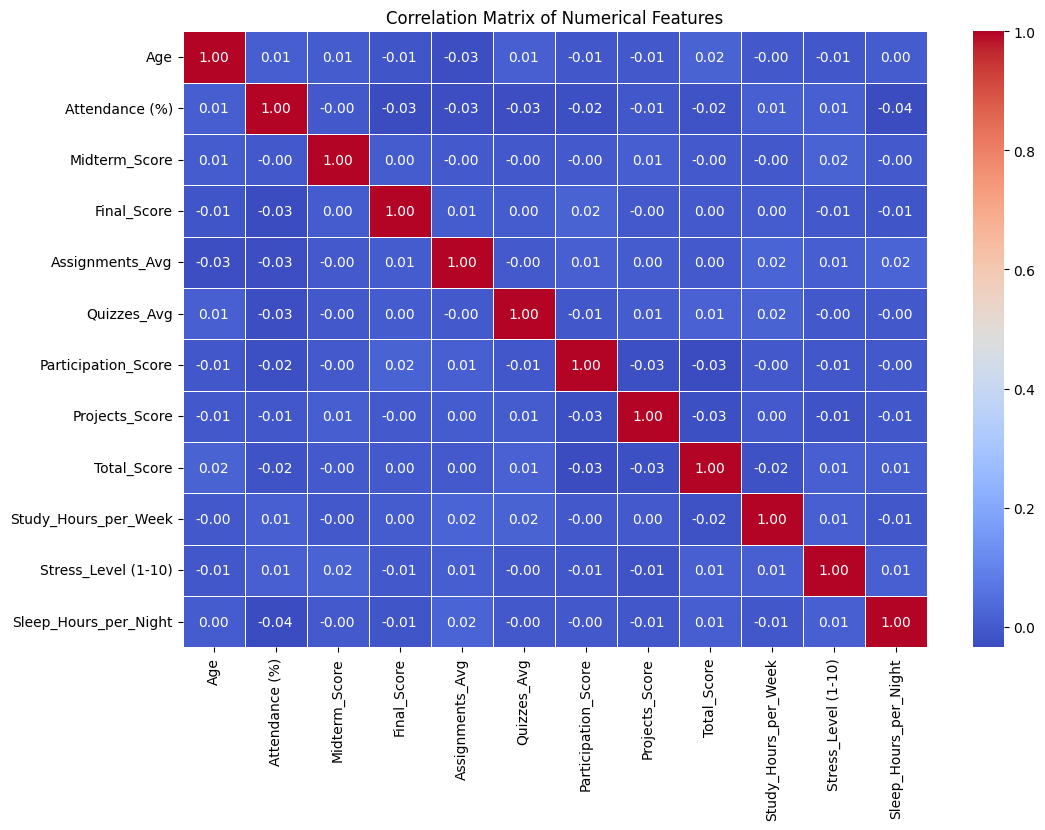

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

#### ***2. ⚡ Is there a difference in performance between males and females?⚡***

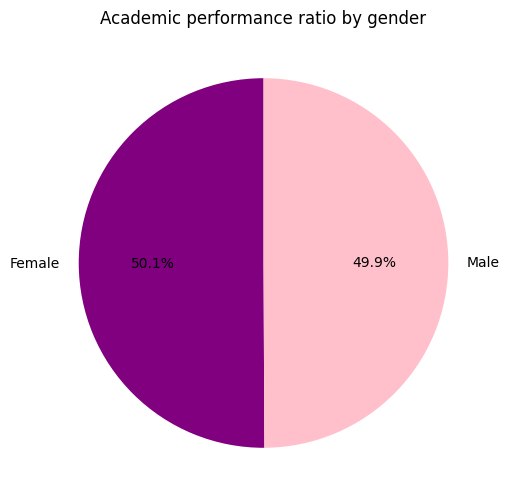

Gender
Female    75.187130
Male      74.965792
Name: Total_Score, dtype: float64

In [ ]:
gender_avg = df.groupby("Gender")["Total_Score"].mean()

plt.figure(figsize=(6, 6))
plt.pie(gender_avg, labels=gender_avg.index, autopct='%1.1f%%', colors=['purple', 'pink'], startangle=90)
plt.title("Academic performance ratio by gender")
plt.show()

gender_grade_avg = df.groupby("Gender")["Total_Score"].mean()
gender_grade_avg

In [ ]:
from scipy.stats import ttest_ind

male_scores = df[df["Gender"] == "Male"]["Total_Score"]
female_scores = df[df["Gender"] == "Female"]["Total_Score"]

t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("🔴 There is a difference in grades between males and females.")
else:
    print("🟢 There is No a difference in grades between males and females.")

T-Statistic: -0.5957
P-Value: 0.5514
🟢 There is No a difference in grades between males and females.


#### ***3. ⚡ Analysis of the relationship between income level and academic performance.⚡***

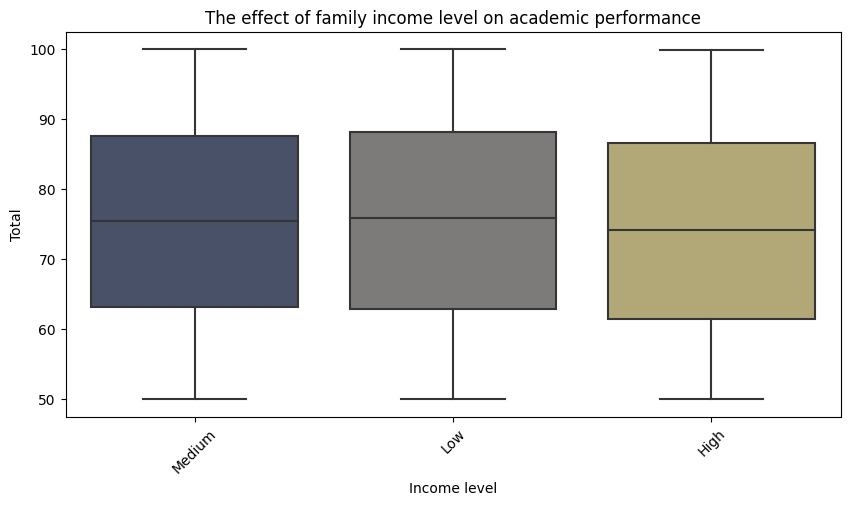

Family_Income_Level
High      74.266848
Low       75.364069
Medium    75.208596
Name: Total_Score, dtype: float64

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Family_Income_Level'], y=df['Total_Score'], palette="cividis")
plt.title("The effect of family income level on academic performance")
plt.xlabel("Income level")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.show()

income_grade_avg = df.groupby("Family_Income_Level")["Total_Score"].mean()
income_grade_avg

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

## ***✨ Summary Of Results: "EDA | Correlations & Patterns📊" ✨***

### ***1.Total grade distribution***
* **Most students scored between 80 and 90.**
* **There are a few students who scored very high or very low.**
* **Grade:
{A  -->  1799}
{B  -->  1177}
{D  -->  1057}
{F  -->  1034}
{C  -->   952}**

### ***2.The relationship between study hours and total grade***
* **There is a positive relationship between the number of study hours and the overall grade.**
* **Students who study for more hours tend to get higher grades.**

### ***3.Distribution of grades by gender***
* **There is no significant difference in the distribution of grades between males and females.**
* **Both sexes show a similar distribution of scores.**

### ***4.The relationship between stress level and total score***
* **Students with higher levels of stress tend to get lower grades.**
* **Stress can be a factor in academic performance.**

### ***5.Sleep hours distribution***
* **Most students sleep between 6 and 8 hours a night.**
* **Lack of sleep can negatively impact academic performance.**

### ***6.The relationship between family income and total score***
* **We note that some categories may have a large overlap in the distribution of scores, which means that income is not the only factor influencing.**

### ***7.The average project scores between departments***
* **All departments have similar averages, ranging from 74.64 to 75.53, indicating a consistent level of performance among students on academic projects.**
* **Mathematics students achieve the highest scores, which may reflect strong analytical skills or the nature of assessment in the department.**
* **Engineering has the lowest average, which may be due to the difficulty of the projects or the strict assessment criteria.**

### ***8.The effect of family income level on academic performance***
* **Students from higher-income families have slightly lower average scores (74.27).**
* **Students from low-income families have the highest average scores (75.36).**
* **Suggesting that academic and personal factors may be more influential than economic factors.**

### ***9.Is there a significant gender difference in academic performance?***
* **There is no significant difference between males and females in academic performance based on overall grades.**

### ***10.Relationship between attendance and overall grades***
* **Some students with high attendance have low grades, While some students with low attendance achieve high grades, indicating that attendance alone is not a sufficient indicator of academic performance.**
* **Attendance alone does not determine academic performance.**

~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

## ***✨ Recommendations ✨***

* **✅ Enhancing the learning environment in departments that suffer from poor performance by improving the quality of teaching and curricula.**
* **✅ Increasing interest in extracurricular activities to support students’ academic and personal skills.**
* **✅ Raising students’ awareness about the importance of organizing study hours to ensure achieving higher grades.**
* **✅ Using prediction models to monitor students at academic risk and provide them with appropriate support early.**

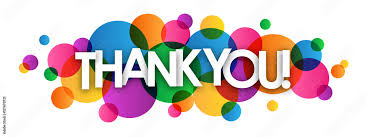